## Clasificación de objetos en vías ferreas utilizando tecnología LIDAR

### Para desarrollar un algoritmo que detectase y clasificase las estructuras ferroviarias presentes en la nube de puntos, dada con la tarea, seguiría los siguientes pasos:

### 1. Preprocesamiento de datos:
#### a.) Limpiar y filtrar los datos para eliminar ruido y puntos irrelevantes (como puntos del suelo).
#### b.) Aplicar un filtro de tamaño a la nube de puntos para eliminar elementos muy pequeños que puedan ser ruido o elementos no deseados, como ramas de árboles.

### 2. Segmentación del terreno y extracción de características:
#### a.) Realizar una segmentación del terreno utilizando técnicas como el algoritmo RANSAC para identificar y separar los elementos estructurales de la vía férrea.
#### b.) Extraer características de los segmentos, como tamaño, forma, orientación y distribución espacial.

### 3. Clustering y agrupación:
### a.) Aplicar técnicas de clustering como k-means, DBSCAN para agrupar puntos similares en función de sus características y ubicaciones espaciales.
### b.) Establecer umbrales para determinar si un grupo representa una estructura ferroviaria relevante o no  (como el tamaño mínimo de un poste, por ejemplo).

### 4. Clasificación:
#### a.) Entrenar un modelo de aprendizaje supervisado, como un árbol de decisión, una red neuronal, un clasificador SVM o un clasificador de Random Forest, utilizando datos etiquetados de estructuras ferroviarias y no ferroviarias.
#### b.) Utilizar el modelo entrenado para clasificar los grupos de puntos como diferentes tipos de estructuras ferroviarias (postes, hilos de contacto, brazos de atirantado, etc.) o elementos no deseados (ramas de árboles, paredes, etc).

### 5. Validación y ajuste del modelo:
#### a.) Validar el rendimiento del modelo utilizando métricas de evaluación como accuracy, F1-score  o matriz de confusión.

### 6. Visualización y análisis de resultados:
#### a.) Visualizar las clasificaciones y las estructuras detectadas en la nube de puntos para verificar si el algoritmo  ha detectado correctamente los elementos de interés. 

### Para llevar a la propuesta he implementado el siguiente codigo: 
### Paso 1

#### Importar librerias necesarias

In [1]:
import open3d as o3d
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Cargar datos

In [41]:
data = pd.read_csv('lidar.csv')

#### Convertir el dataframe a una nube de puntos de Open3D

In [40]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(data[['X', 'Y', 'Z']].values)

#### Filtrado de datos: eliminar ruido y puntos irrelevantes

In [44]:
pcd_filtered = pcd.voxel_down_sample(voxel_size=0.05)

### Paso 2

#### Segmentación del terreno y extracción de características: 
#### Aquí aplicamos un filtro de segmentación del plano usando RANSAC

In [43]:
plane_model, inliers = pcd_filtered.segment_plane(distance_threshold=0.1, ransac_n=3, num_iterations=1000)
pcd_without_ground = pcd_filtered.select_by_index(inliers, invert=True)

#### Extraer características 

In [45]:
features = np.asarray(pcd_without_ground.points)

####  Normalizar la nube de puntos

In [46]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Paso 3

#### Clustering y agrupación

In [47]:
dbscan = DBSCAN(eps=0.3, min_samples=15)
labels = dbscan.fit_predict(features_scaled)

In [38]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

#### Asignar colores a las etiquetas

In [39]:
max_label = labels.max() + 1
label_to_color = {i: np.random.rand(3) for i in range(max_label)}
label_to_color[-1] = np.array([0, 0, 0])  

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Controlador no válido. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: La operación de transformación solicitada no es compatible. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: La operación de transformación solicitada no es compatible. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: La operación de transformación solicitada no es compatible. 


#### Visualización de resultados de clustering

In [ ]:
pcd_without_ground.colors = o3d.utility.Vector3dVector(np.asarray([label_to_color[label] for label in labels]))
o3d.visualization.draw_geometries([pcd_without_ground])

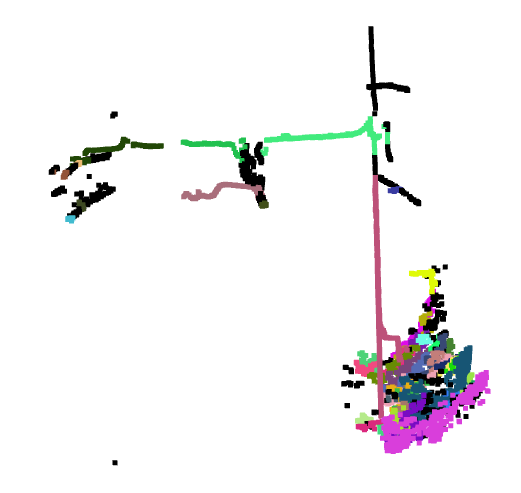

#### Creacion de la columna "label" 

In [14]:
points = np.asarray(pcd_without_ground.points)
df = pd.DataFrame(points, columns=['X', 'Y', 'Z'])
df['label'] = labels

# Mostrar las primeras filas del DataFrame
df.head()

,X,Y,Z,label
0,-3735.955,1192.64,-377980.59375,0
1,-2059.531,5922.98,-381105.37500,1
2,-2858.434,207.17,-380974.40625,2
3,-3153.050,389.79,-378548.06250,3
4,153.825,5545.67,-377980.59375,-1


### Conclusiones:

#### 1. La segmentacion de la nube de puntos ayuda a centrarse en las estructuras y objetos de interés.
#### 2. El clustering DBSCAN permite agrupar los puntos en diferentes estructuras y objetos basados en su densidad y proximidad.

### Próximos pasos:

#### 1. Mejorar la segmentación: Se pueden ajustar los parámetros del algoritmo RANSAC y DBSCAN o probar otros algoritmos de segmentación y clustering.

#### 2. Extraer características: Calcular características geométricas y descriptores para cada clúster, como tamaño, orientación, forma, etc., que puedan ayudar en la clasificación de las estructuras.

#### 3. Clasificación de estructuras: Entrenar un modelo de aprendizaje supervisado o no supervisado, como Random Forest, SVM, Redes Neuronales o PointNet, utilizando las características extraídas y las etiquetas de las estructuras conocidas. Luego, aplicar el modelo entrenado para clasificar nuevas nubes de puntos.

#### 4. Filtrado de ruido y elementos irrelevantes: Desarrollar un enfoque para eliminar objetos no relacionados con la infraestructura ferroviaria, como ramas de árboles y paredes, que puedan generar errores en la clasificación.

#### 5. Validación y evaluación: Realizar una validación cruzada y evaluar el rendimiento del modelo de clasificación utilizando métricas como accuracy y F1-score. Si es necesario, ajustar el modelo y los parámetros para mejorar el rendimiento.

#### 6. Visualización y análisis de resultados: Utilizar herramientas de visualización y análisis para examinar y validar los resultados de clasificación de las estructuras ferroviarias en 3D.